In [1]:
import blinpy as bp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.optimize import minimize
from helpers import *
from pygam.datasets import mcycle
from sklearn.model_selection import train_test_split
%matplotlib inline

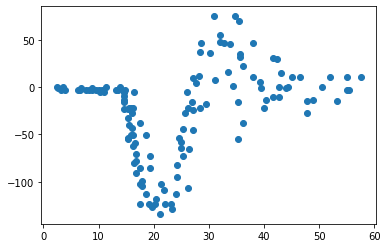

In [2]:
# generate data
X, y = mcycle(return_X_y=True)
plt.scatter(X,y)

        Model  Mean Squared Error  Mean Absolute Error
0  exp square         1770.716995            34.894644
1    rat quad         1834.443665            35.276707
2     orn uhl          488.194659            16.823397


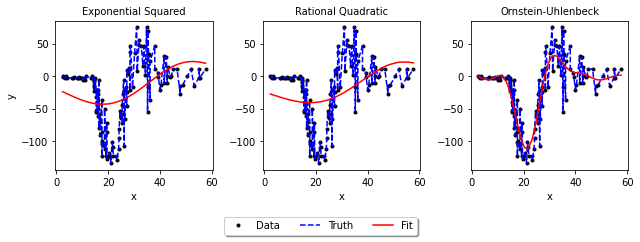

In [7]:
perf_gp, fig = fit_gp_gammy_univariate(X,y)
fig.savefig("univariate_figures/figure1.pdf", format="pdf", bbox_inches="tight")
print(perf_gp)
plt.show()

                           Model  Mean Squared Error  Mean Absolute Error
0                         Smooth          392.989879            13.911004
1              Smooth + Periodic          393.459552            13.959222
2  Smooth + Periodic + Symmetric          393.459552            13.959222


<Figure size 648x216 with 0 Axes>

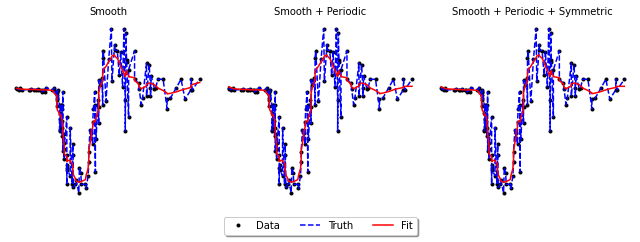

In [8]:
perf_pp, fig = fit_difference_priors(xobs=X, yobs=y, xfit=X, ytrue=y)
fig.savefig("univariate_figures/figure2.pdf", format="pdf", bbox_inches="tight")
print(perf_pp)
plt.show()

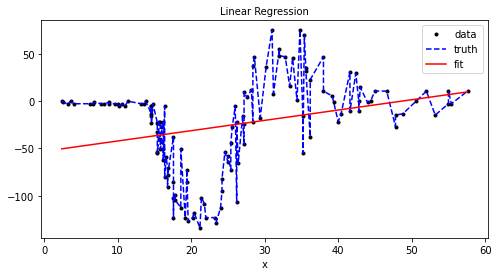

In [9]:
perf_lm, fig2 = fit_linear_regression(X, y, X, y)
fig2.savefig("univariate_figures/figure3.pdf", format="pdf", bbox_inches="tight")
plt.show()

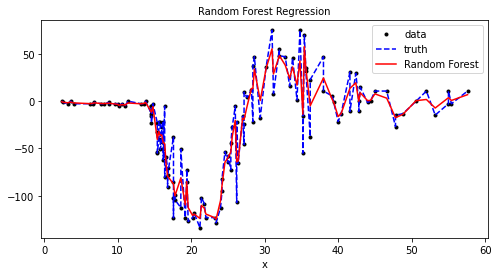

           Model  Mean Squared Error  Mean Absolute Error
0  Random Forest          221.115864             9.958049


In [10]:
perf_rf, fig3 = fit_rf_regression(X, y, X, y)
fig3.savefig("univariate_figures/figure4.pdf", format="pdf", bbox_inches="tight")
plt.show()
print(perf_rf)

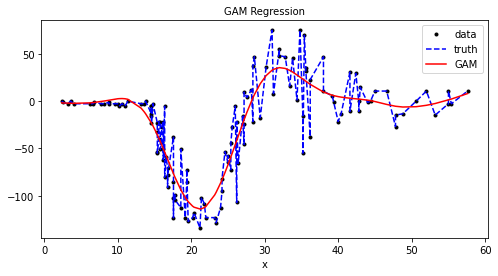

In [11]:
perf_gam, fig4 = fit_gam_regression(xobs=X, yobs=y, xfit=X, ytrue=y)
fig4.savefig("univariate_figures/figure5.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [12]:
result = pd.DataFrame(pd.concat([perf_gp, perf_pp, perf_lm, perf_rf, perf_gam], ignore_index=True))
result = result.round(5)
result.head(10)

,Model,Mean Squared Error,Mean Absolute Error
0,exp square,1770.71700,34.89464
1,rat quad,1834.44367,35.27671
2,orn uhl,488.19466,16.82340
3,Smooth,392.98988,13.91100
4,Smooth + Periodic,393.45955,13.95922
5,Smooth + Periodic + Symmetric,393.45955,13.95922
6,Linear Regression,2113.86335,37.13038
7,Random Forest,221.11586,9.95805
8,Frequentist Penalized Regression with B-splines,481.61761,16.56974


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5f326d22-a82a-4862-a730-91e41c15ce9a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>